<a href="https://colab.research.google.com/github/cesaralejon/kmeans/blob/main/Kmeans_Cesar_Olmedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
filename = ('/content/drive/MyDrive/Coding Dojo/Week 8/cust_seg.csv')
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


## Parte 1

In [9]:
df.drop(columns= 'Unnamed: 0', inplace=True)

In [10]:
df.dropna(inplace = True)

In [13]:
scalar = StandardScaler()
scalar_df = scalar.fit_transform(df)

In [15]:
Kmeans= KMeans(n_clusters=3)


In [17]:
Kmeans.fit(scalar_df)

KMeans(n_clusters=3)

In [18]:
Kmeans.labels_

array([0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,

In [19]:
df['N° Cluster'] = Kmeans.labels_

In [20]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,N° Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


## Parte 2

Text(0, 0.5, 'Income')

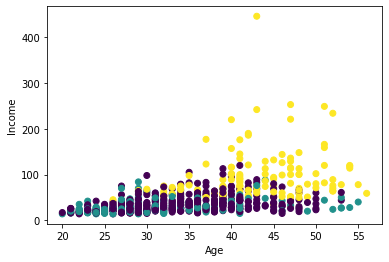

In [24]:
plt.scatter(df['Age'], df['Income'], c = df['N° Cluster'])
plt.xlabel('Age')
plt.ylabel('Income')


In [27]:
c0 = df[df['N° Cluster'] == 0]
c1 = df[df['N° Cluster'] == 1]
c2 = df[df['N° Cluster'] == 2]
c3= df[df['N° Cluster'] == 3]

In [28]:
c0.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,N° Cluster
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0,413.000000,413.0
mean,439.440678,33.740920,1.598063,7.658596,36.261501,0.786349,1.742174,0.0,7.552058,0.0
std,247.372277,6.884145,0.860794,5.251182,17.866261,0.717955,1.228301,0.0,4.692809,0.0
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.0,0.400000,0.0
25%,228.000000,29.000000,1.000000,4.000000,24.000000,0.273000,0.860000,0.0,4.200000,0.0
50%,437.000000,33.000000,1.000000,7.000000,32.000000,0.559000,1.425000,0.0,6.600000,0.0
75%,668.000000,39.000000,2.000000,11.000000,44.000000,1.066000,2.349000,0.0,10.100000,0.0
max,849.000000,53.000000,5.000000,23.000000,120.000000,4.637000,7.286000,0.0,23.800000,0.0


In [29]:
c1.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,N° Cluster
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,418.074074,31.345679,1.858025,3.679012,30.481481,1.488407,2.745475,0.969136,13.972840,1.0
std,240.065119,7.694736,0.938264,3.579886,14.109255,1.305978,2.232018,0.173486,7.436481,0.0
min,3.000000,20.000000,1.000000,0.000000,14.000000,0.073000,0.161000,0.000000,0.900000,1.0
25%,207.000000,25.250000,1.000000,1.000000,20.000000,0.452250,1.237000,1.000000,8.250000,1.0
50%,439.500000,29.000000,2.000000,3.000000,27.000000,1.198000,2.229000,1.000000,13.200000,1.0
75%,607.500000,35.750000,2.000000,6.000000,36.750000,1.981750,3.663750,1.000000,18.550000,1.0
max,848.000000,55.000000,4.000000,15.000000,88.000000,6.912000,15.405000,1.000000,35.300000,1.0


In [30]:
c2.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,N° Cluster
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.0
mean,416.848000,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.20800,14.398400,2.0
std,234.413133,6.102903,1.057996,6.146628,56.262103,3.529728,4.557522,0.40751,7.621023,0.0
min,2.000000,26.000000,1.000000,5.000000,30.000000,0.288000,1.003000,0.00000,2.300000,2.0
25%,227.000000,39.000000,1.000000,12.000000,63.000000,1.875000,4.695000,0.00000,8.500000,2.0
50%,422.000000,43.000000,2.000000,17.000000,78.000000,3.237000,6.681000,0.00000,13.400000,2.0
75%,638.000000,47.000000,3.000000,21.000000,114.000000,5.060000,9.555000,0.00000,18.700000,2.0
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.00000,41.300000,2.0


In [31]:
c3.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,N° Cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
